>
#Librerias

In [914]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

>
# Datos

In [915]:
X = np.array((
    (0, 0, 10),
    (0, 1, 50),
    (0, 1, 58),
    (1, 1, 60),
    (1, 0, 70),
    (2, 0, 80),
    (2, 1, 30),
    (2, 0, 10),
))
y = np.array((0,0,1,1,1,2,3,2))

>
# Visualización de los datos

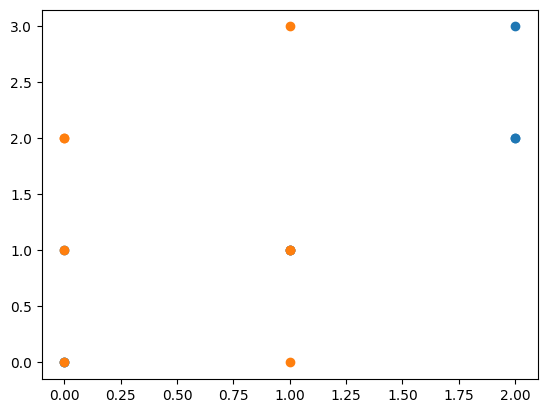

In [916]:
for i in range(2):
  plt.scatter(X[:,i],y)

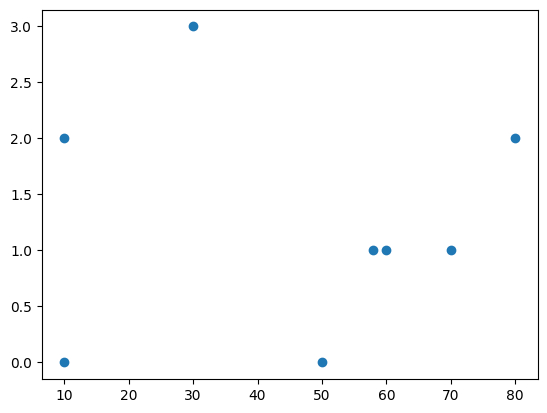

In [917]:
plt.scatter(X[:,2],y)

>
# Seleccionamos el modelo

definimos las capas ocultas, la función de activación, el ratio de aprendizaje, las iteraciones

In [918]:
modelo = MLPClassifier(
    hidden_layer_sizes=(3,),
    activation='logistic',
    learning_rate='adaptive',
    learning_rate_init=0.02,
    max_iter=600
)

entrenamos el modelo con los datos y predecimos los mismos datos

In [919]:
modelo.fit(X, y)
pred = modelo.predict(X)

In [920]:
def predic(X,y,ratio_aprend,iter):
  modelo = MLPClassifier(
    hidden_layer_sizes=(3,),
    activation = 'logistic',
    learning_rate = 'adaptive',
    learning_rate_init = ratio_aprend,
    max_iter = iter
  )
  modelo.fit(X, y)
  return modelo.predict(X)

>
# Resultados

In [921]:
def matrix_conf(modelo,X,y):
  disp = ConfusionMatrixDisplay.from_estimator(
    modelo, X, y,
    display_labels=np.array((0,1,2,3)),
    cmap=plt.cm.Blues,
  )
  plt.show()

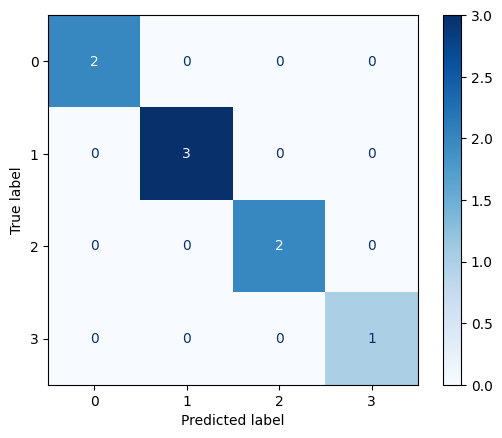

In [922]:
matrix_conf(modelo,X,y)

In [923]:
def multiclase(y):
  y_ = []
  for i in range(4):
    lista = []
    for j in range(y.shape[0]):
      lista.append(int(y[j] == i))
    y_.append(lista)
  return y_

In [924]:
def ROC(y,pred):
  y_ = multiclase(y)
  pred_ = multiclase(pred)
  mean_tpr = 0.0
  mean_fpr = np.linspace(0, 1, 100)

  for i in range(4):

    # 4 ROC
    fpr, tpr, thresh= roc_curve(y_[i], pred_[i], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC clase %d (area = %0.2f)' % (i, auc(fpr, tpr)))
    # Mean ROC
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

  # Plot mean ROC
  mean_tpr[0] = 0.0
  mean_tpr /= 4
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, 'k--',
          label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

  plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Classifier')
  plt.xlim([-0.05, 1.05])
  plt.ylim([-0.05, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()

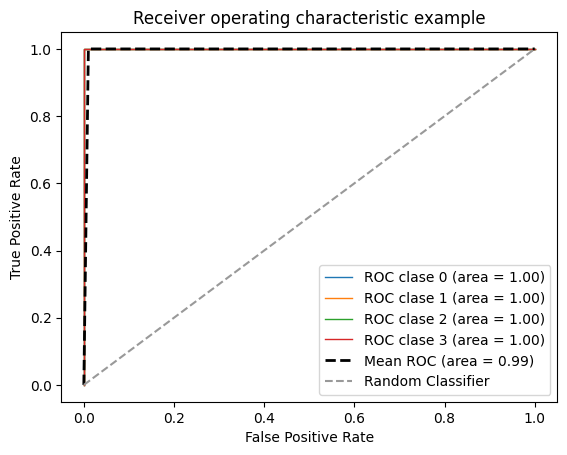

In [928]:
ROC(y,predic(X,y,0.02,300))

In [925]:
def ROC_test(y,pred):

  y_ = multiclase(y)
  pred_ = multiclase(pred)
  mean_tpr = 0.0

  for i in range(4):
    fpr, tpr, thresh= roc_curve(y_[i], pred_[i], pos_label=1)
    mean_tpr += auc(fpr, tpr)

  return mean_tpr/4

In [926]:
import warnings

warnings.filterwarnings("ignore")

ratio_aprend = np.linspace(0.001, 1, 50)
iteraciones = np.linspace(100, 1000, 50, dtype='int')
resultados = []
for ratio in ratio_aprend:
  resultados_iter = []
  for iter in iteraciones:
    res = ROC_test(y,predic(X,y,ratio,int(iter)))
    resultados_iter.append(res)
  resultados.append(resultados_iter)

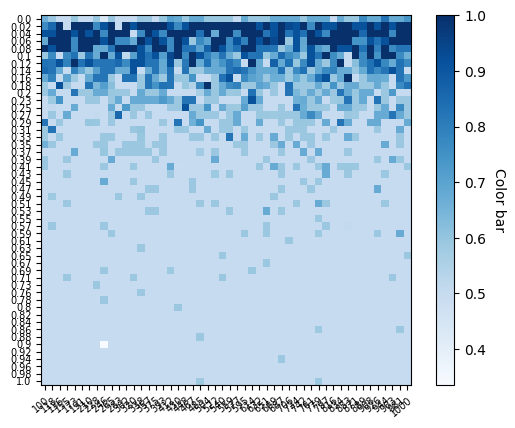

In [927]:
fig, ax = plt.subplots()
iteraciones = iteraciones.round(0)
ratio_aprend = ratio_aprend.round(2)

ax.set_xticks(np.arange(len(iteraciones)), labels = iteraciones)
ax.set_yticks(np.arange(len(ratio_aprend)), labels = ratio_aprend)
plt.setp(ax.get_xticklabels(), rotation = 40, ha = "right", rotation_mode = "anchor")

ax.set_xticklabels(iteraciones, fontsize=7)
ax.set_yticklabels(ratio_aprend, fontsize=7)

im = ax.imshow(resultados, cmap = "Blues")

cbar = ax.figure.colorbar(im, ax = ax)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")

plt.show()